In [1]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import random
import os
import pathlib
from sklearn.preprocessing import LabelEncoder
from scipy import misc
import matplotlib.pyplot as plt

# the directory where all the images are in
datapath = 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images'

# Get the filepath for every image and append them into list 'rawfiles'
rawfiles = []
for path, subdirs, files in os.walk(datapath):
    for name in files:
        rawfiles.append(os.path.join(path, name))


Using TensorFlow backend.


In [2]:
# Set the training set lenth as 80% of the wholw rawfiles
trainsz = int(len(rawfiles) * 0.8)
# Set the test set lenth as 20% of the wholw rawfiles
testsz = int(len(rawfiles) * 0.2)

# Randomly select images from rawfiles
random.seed(1)
trainset = random.sample(rawfiles, trainsz)
testset = [x for x in rawfiles if not x in trainset]
print(trainset[0:5], testset[0:5])

# Get labels for train set and test set
train_labels = []
test_labels = []
for file in trainset:
    train_labels.append(file.split('\\')[-2])
    
for file in testset:
    test_labels.append(file.split('\\')[-2])
    
for i in range(len(train_labels)):
    train_labels[i] = train_labels[i][10:]
for i in range(len(test_labels)):
    test_labels[i] = test_labels[i][10:]

# Use labelencoder to encode labels
lb = LabelEncoder()
train_labelsn = lb.fit_transform(train_labels)
test_labelsn = lb.transform(test_labels)
lb.inverse_transform([119,118,117])


['G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02091635-otterhound\\n02091635_1333.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02112137-chow\\n02112137_10731.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02088238-basset\\n02088238_9585.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02097130-giant_schnauzer\\n02097130_1633.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02091134-whippet\\n02091134_13957.jpg'] ['G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02085620-Chihuahua\\n02085620_1298.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dogs\\Images\\n02085620-Chihuahua\\n02085620_1455.jpg', 'G:\\My Study\\Springboard\\Projects\\Capstone2\\Dog

array(['wire-haired_fox_terrier', 'whippet', 'vizsla'],
      dtype='<U30')

In [8]:
# Move train set images from original director ("...\\Images") to new path ("...\\Images\\trainset")
for file in trainset:
    directory = '{}\\trainset\\{}'.format(datapath, file.split('\\')[-2])
    newpath = '{}\\trainset\\{}\\{}'.format(datapath, file.split('\\')[-2], file.split('\\')[-1])
    if not os.path.exists(directory):
        os.makedirs(directory)
    os.rename(file, newpath)

In [21]:
# Move test set images from original director ("...\\Images") to new path ("...\\Images\\testset")
for file in testset:
    directory = '{}\\testet\\{}'.format(datapath, file.split('\\')[-2])
    newpath = '{}\\testset\\{}\\{}'.format(datapath, file.split('\\')[-2], file.split('\\')[-1])
    if not os.path.exists(directory):
        os.makedirs(directory)
    os.rename(file, newpath)

# Model 1: VGG Model

In [6]:
# Set target size, number of channels, batch size, and number of epochs 
IMAGE_HEIGHT  = 200
IMAGE_WIDTH   = 200
NUM_CHANNELS  = 3
BATCH_SIZE    = 16
EPOCHS = 400


train_data_dir = 'D://PythonProjects//Dogs//Images//trainset'
test_data_dir = 'D://PythonProjects//Dogs//Images//testset'

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
    
model = Sequential()

# Convolution block1
model.add(Conv2D(16, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(32, (3,3),input_shape=input_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())

# Convolution block2
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3,3),input_shape=input_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())

# Convolution block3
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(128, (3,3),input_shape=input_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())

# Conv4
model.add(Conv2D(128, (3, 3), input_shape=input_shape, padding='same'))
model.add(Conv2D(256, (3,3),input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# Conv5
model.add(Conv2D(256, (3, 3), input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3,3),input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('softmax'))

#model.load_weights('second_try.h5')

sgd = optimizers.SGD(lr=0.01, decay=1e-5)
hist_CV = model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [21]:
# print the model archetecher
plot_model(model, to_file='model_VG.png')

In [7]:
# augment and rescale the images for training data
train_datagen = ImageDataGenerator(
                                   rotation_range=0.3,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   rescale=1. / 255)

# rescale images for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)

# Set up modelcheck point to save weights per 20 epoches
checkpoint = ModelCheckpoint('VG_weights.h5', monitor='val_acc', verbose=0,
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=20)
# To stop the training if there is no improvement for validation accuracy in 20 epoches
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=20, 
                          verbose=0, mode='auto')

callbacklist = [checkpoint, earlystop]

hist_VG = model.fit_generator(train_generator,
                   steps_per_epoch = 16464//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    validation_steps=4116//BATCH_SIZE,
                    callbacks=callbacklist,
                    )

model.save_weights('VG_weights.h5')

Found 16464 images belonging to 120 classes.
Found 4116 images belonging to 120 classes.
Epoch 1/400
1029/1029 [==============================] - 138s 135ms/step - loss: 5.1356 - acc: 0.0113 - val_loss: 4.7581 - val_acc: 0.0195
Epoch 2/400
1029/1029 [==============================] - 137s 134ms/step - loss: 4.7826 - acc: 0.0176 - val_loss: 4.6294 - val_acc: 0.0233
Epoch 3/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.7105 - acc: 0.0211 - val_loss: 4.5335 - val_acc: 0.0348
Epoch 4/400
1029/1029 [==============================] - 138s 134ms/step - loss: 4.6418 - acc: 0.0231 - val_loss: 4.7610 - val_acc: 0.0165
Epoch 5/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.5934 - acc: 0.0254 - val_loss: 4.4390 - val_acc: 0.0355
Epoch 6/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.5241 - acc: 0.0310 - val_loss: 4.4306 - val_acc: 0.0302
Epoch 7/400
1029/1029 [==============================] - 137s 133ms/step - lo

Epoch 59/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.5833 - acc: 0.3084 - val_loss: 2.2125 - val_acc: 0.3966
Epoch 60/400
1029/1029 [==============================] - 136s 133ms/step - loss: 2.5504 - acc: 0.3160 - val_loss: 2.2059 - val_acc: 0.3959
Epoch 61/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.5238 - acc: 0.3268 - val_loss: 2.1748 - val_acc: 0.4071
Epoch 62/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.4891 - acc: 0.3288 - val_loss: 2.1157 - val_acc: 0.4159
Epoch 63/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.4584 - acc: 0.3371 - val_loss: 2.1186 - val_acc: 0.4146
Epoch 64/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.4299 - acc: 0.3423 - val_loss: 2.1402 - val_acc: 0.4076
Epoch 65/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.4104 - acc: 0.3508 - val_loss: 2.3137 - val_acc: 0.3821
Epoch 66/400
1029/10

1029/1029 [==============================] - 136s 132ms/step - loss: 1.0656 - acc: 0.6699 - val_loss: 1.6481 - val_acc: 0.5927
Epoch 176/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0454 - acc: 0.6781 - val_loss: 1.5561 - val_acc: 0.6085
Epoch 177/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0503 - acc: 0.6778 - val_loss: 1.6014 - val_acc: 0.5902
Epoch 178/400
1029/1029 [==============================] - 137s 133ms/step - loss: 1.0431 - acc: 0.6812 - val_loss: 1.5852 - val_acc: 0.5975
Epoch 179/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0276 - acc: 0.6874 - val_loss: 1.5877 - val_acc: 0.6000
Epoch 180/400
1029/1029 [==============================] - 137s 133ms/step - loss: 1.0246 - acc: 0.6880 - val_loss: 1.5311 - val_acc: 0.5948
Epoch 181/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0281 - acc: 0.6853 - val_loss: 1.5659 - val_acc: 0.5963
Epoch 182/400
1029/1029 [==

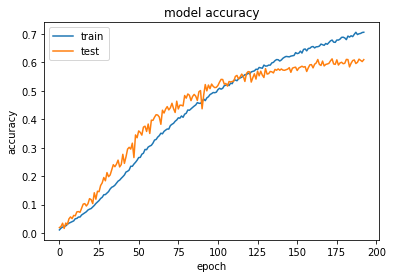

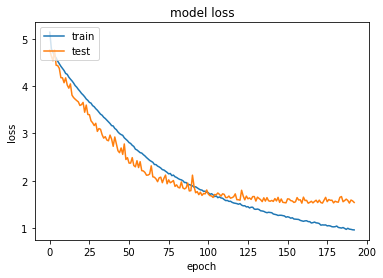

In [8]:
# summarize history for accuracy
plt.plot(hist_VG.history['acc'])
plt.plot(hist_VG.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_VG.history['loss'])
plt.plot(hist_VG.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

val_generator = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=False)

predictions = model.predict_generator(val_generator, steps=258)
# Get most likely class
vgg_y_pred = np.argmax(predictions, axis=1) 
vgg_y_test = val_generator.classes
class_labels = list(val_generator.class_indices.keys())    

vggcf_report = classification_report(vgg_y_test, vgg_y_pred, target_names=class_labels)
print(vggcf_report)    

Found 4116 images belonging to 120 classes.
                                          precision    recall  f1-score   support

                     n02085620-Chihuahua       0.38      0.21      0.27        39
              n02085782-Japanese_spaniel       0.86      0.84      0.85        44
                   n02085936-Maltese_dog       0.64      0.80      0.71        49
                      n02086079-Pekinese       0.71      0.61      0.65        28
                      n02086240-Shih-Tzu       0.68      0.50      0.58        42
              n02086646-Blenheim_spaniel       0.79      0.79      0.79        38
                      n02086910-papillon       0.83      0.77      0.80        39
                   n02087046-toy_terrier       0.59      0.49      0.53        41
           n02087394-Rhodesian_ridgeback       0.25      0.43      0.32        30
                  n02088094-Afghan_hound       0.63      0.80      0.70        46
                        n02088238-basset       0.48  

Confusion matrix, without normalization
[[ 8  0  0 ...,  2  2  0]
 [ 0 37  0 ...,  0  0  0]
 [ 0  0 39 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 21  1  0]
 [ 0  0  0 ...,  2 20  1]
 [ 0  0  0 ...,  0  0 31]]
Normalized confusion matrix
[[ 0.21  0.    0.   ...,  0.05  0.05  0.  ]
 [ 0.    0.84  0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.8  ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.66  0.03  0.  ]
 [ 0.    0.    0.   ...,  0.07  0.69  0.03]
 [ 0.    0.    0.   ...,  0.    0.    0.97]]


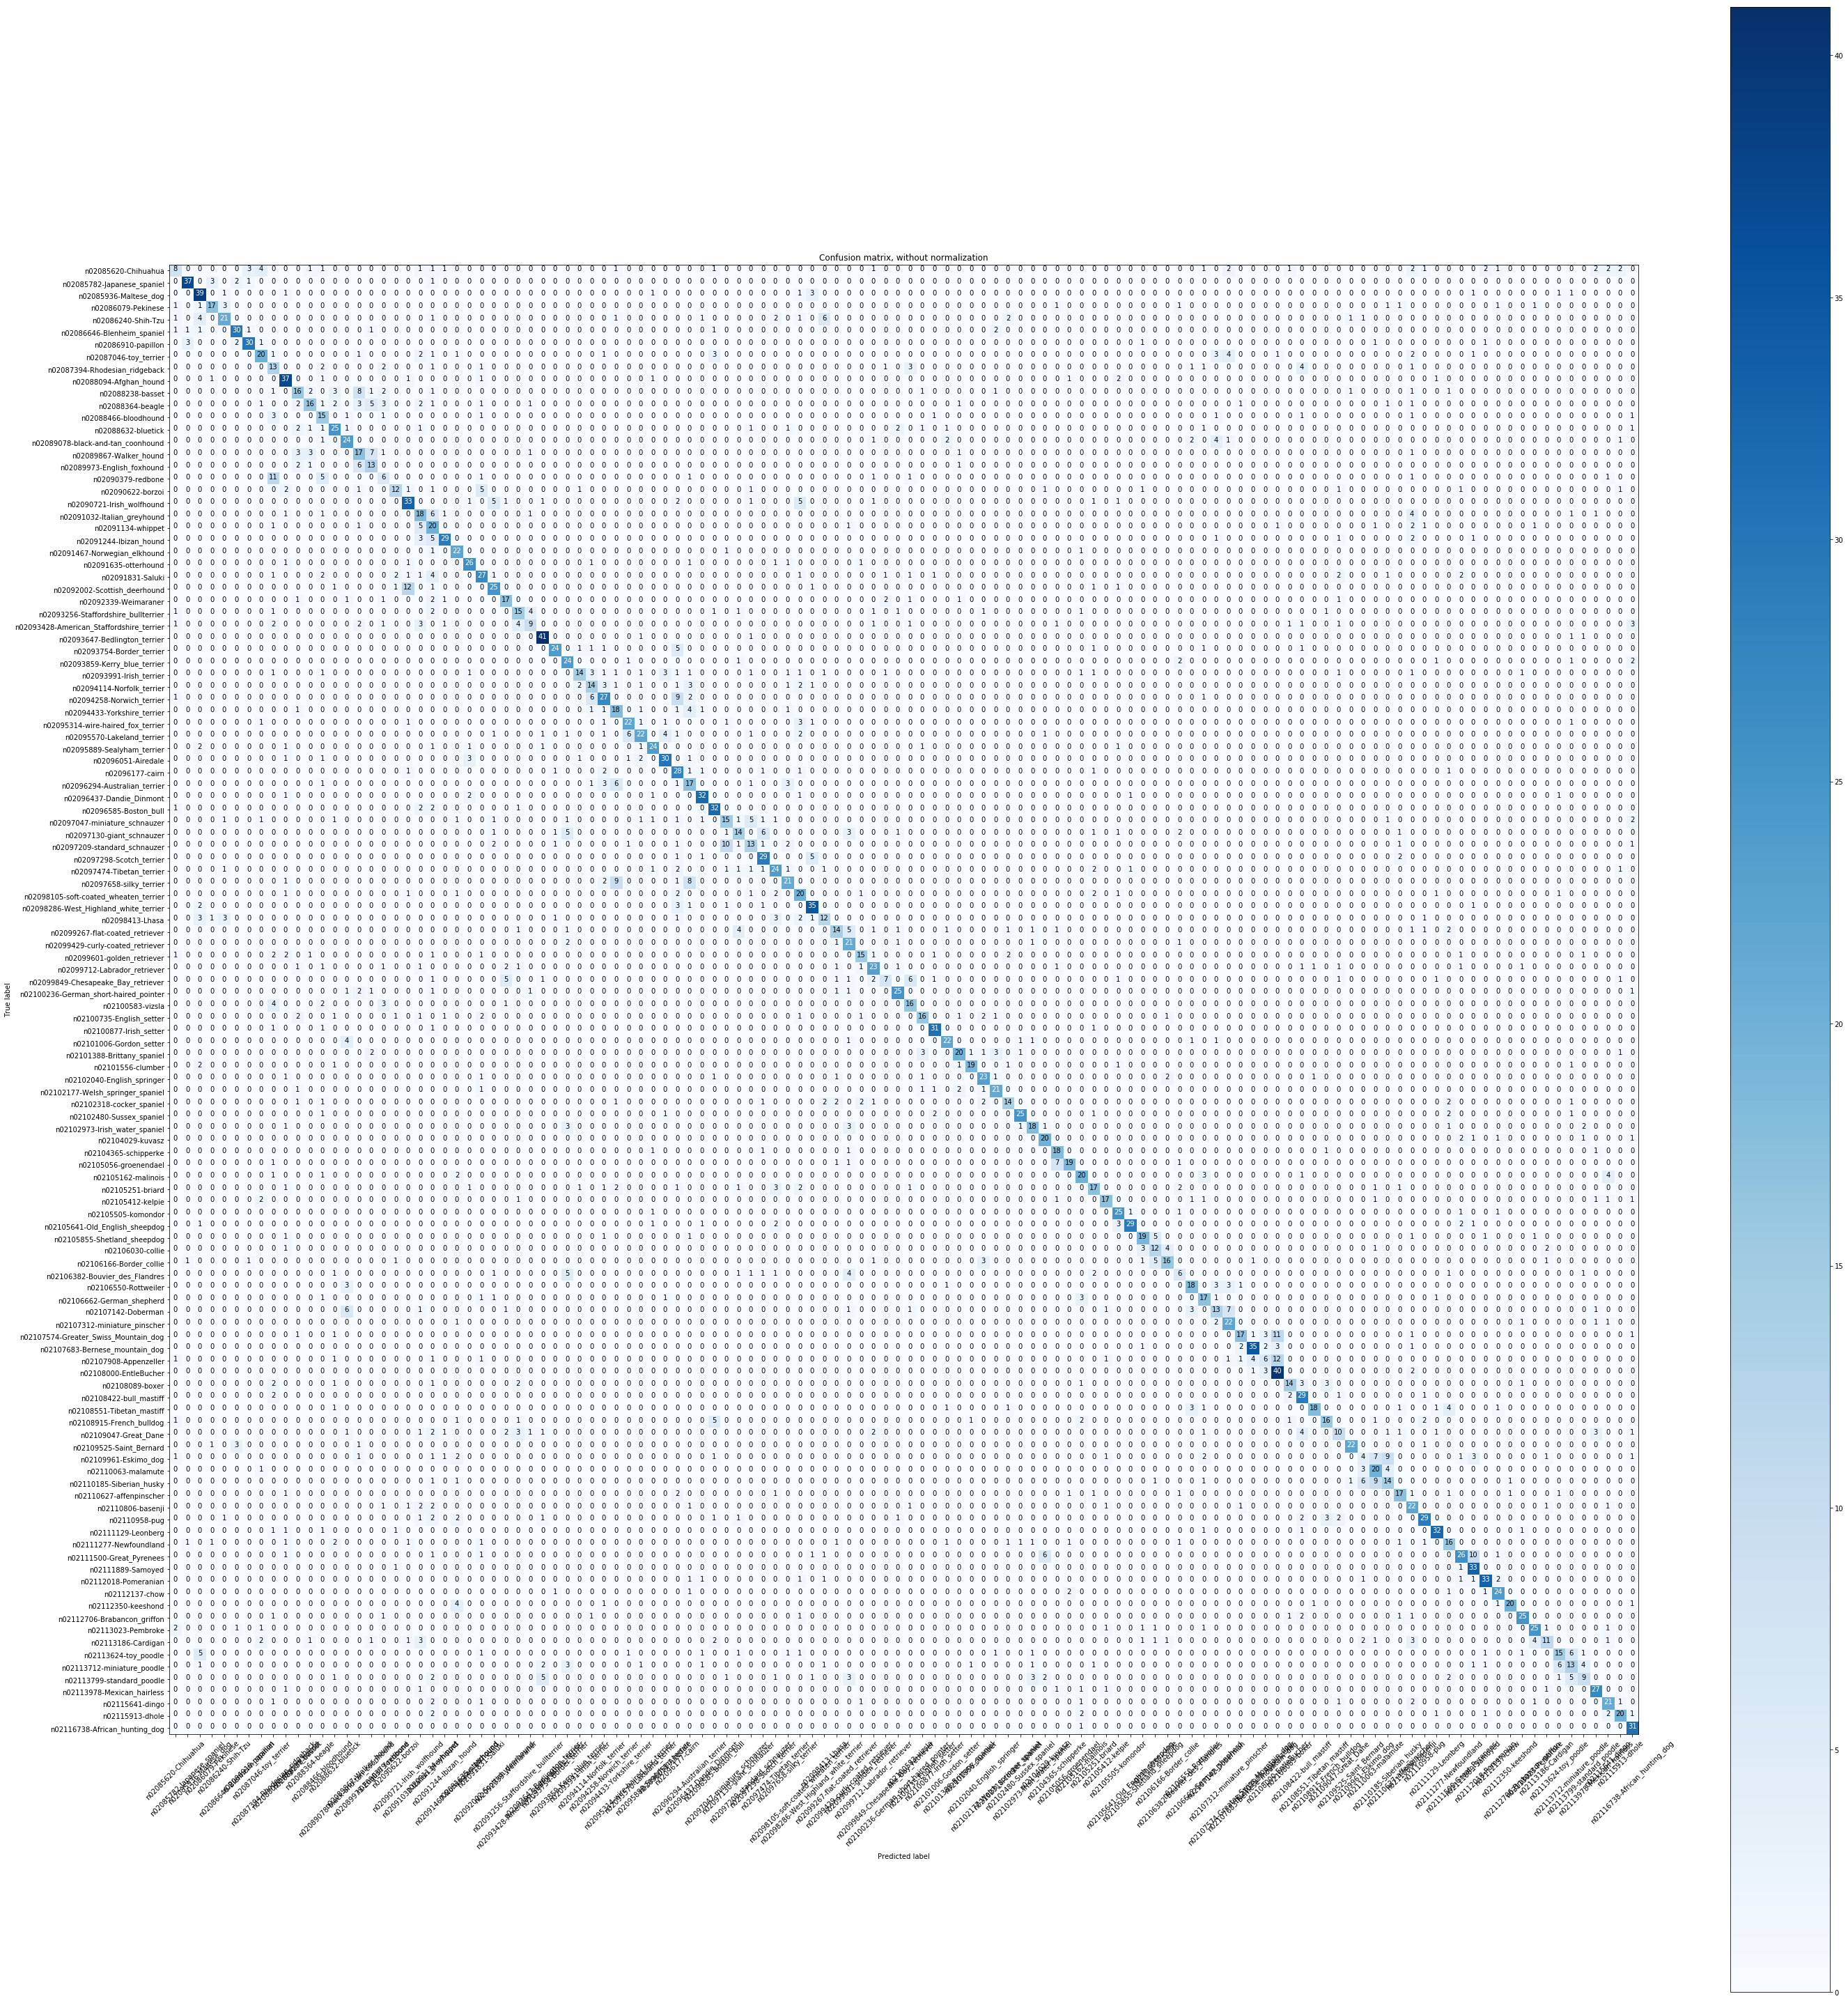

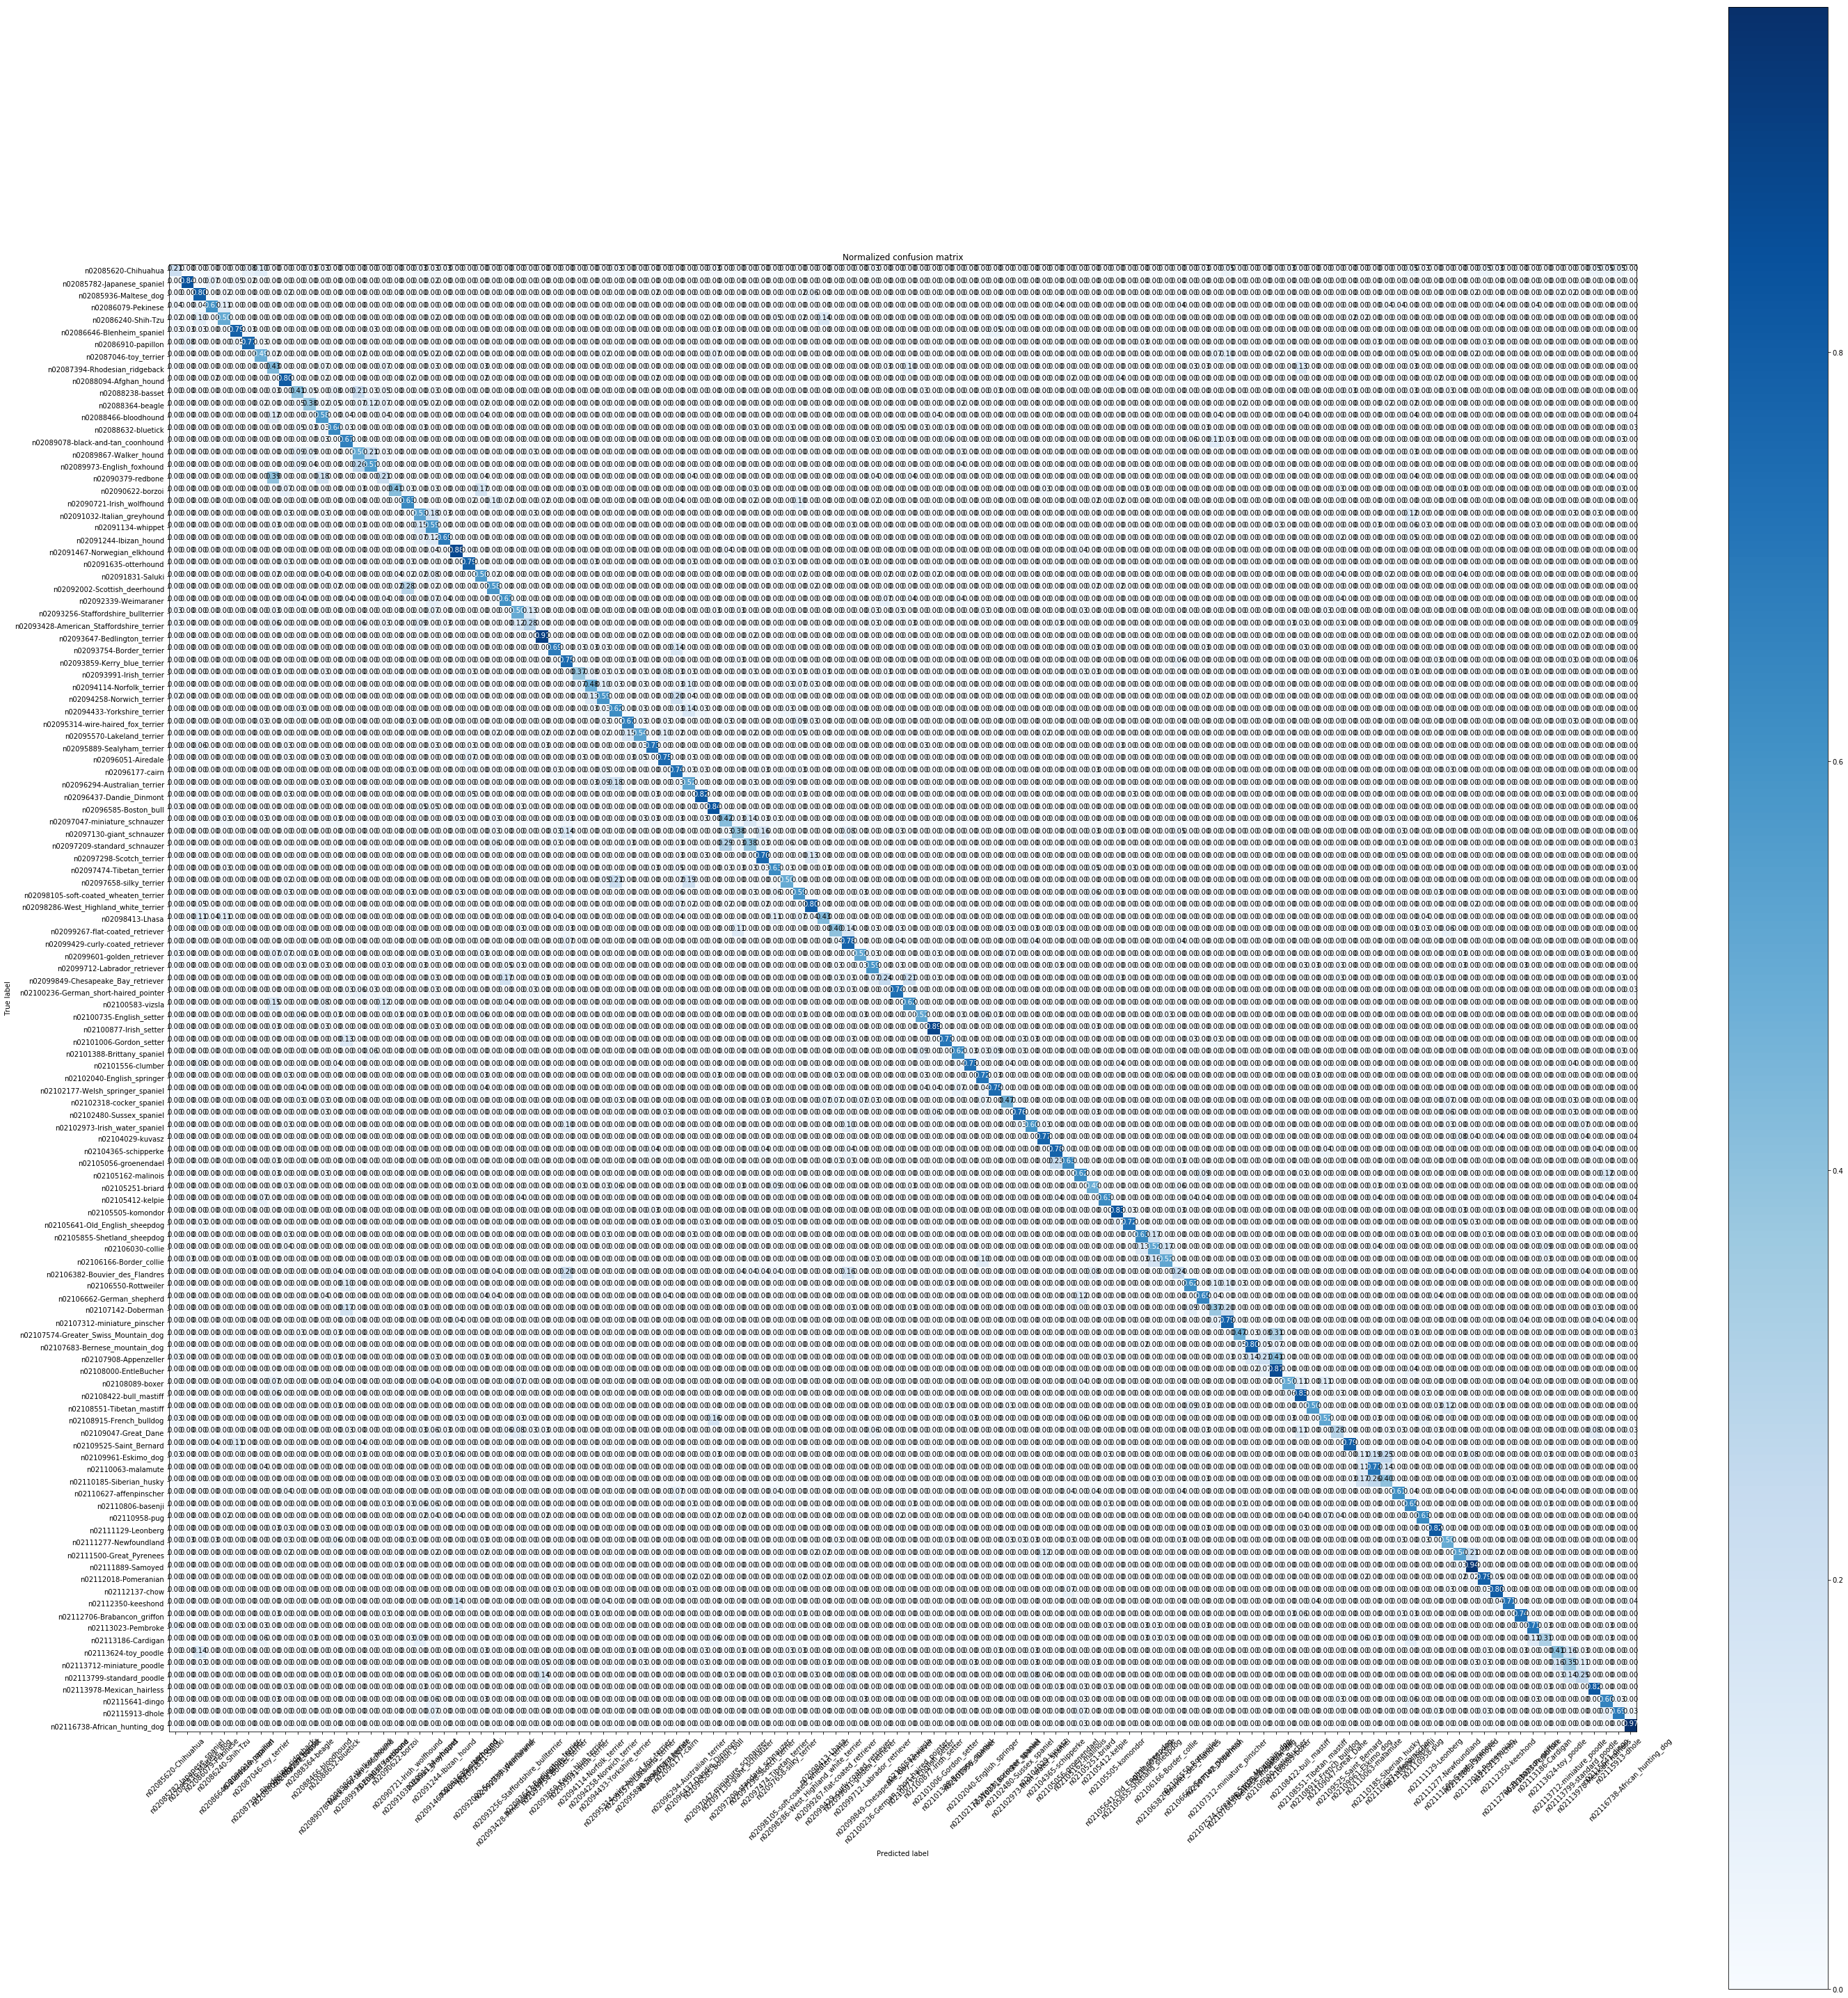

In [84]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
vgg_matrix = confusion_matrix(vgg_y_test, vgg_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(40,40))
plot_confusion_matrix(vgg_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(40,40))
plot_confusion_matrix(vgg_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

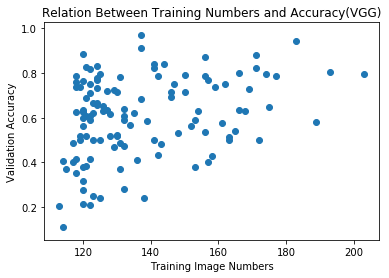

In [85]:
import os
from collections import defaultdict
train_count = defaultdict(int)

for files in list(os.walk('D:\\PythonProjects\\Dogs\\Images\\trainset'))[1:]:
    key = files[0].split('\\')[-1]
    val = len(files[2])
    train_count[key] = val

Img_count = pd.DataFrame.from_dict(train_count, orient='index')
Img_count.columns = ['img_count']

recall = np.diag(vgg_matrix.astype('float') / vgg_matrix.sum(axis=1)[:, np.newaxis])

Img_count['recall'] = pd.Series(recall, index = Img_count.index)
plt.scatter(Img_count.img_count, Img_count.recall)
plt.title('Relation Between Training Numbers and Accuracy(VGG)')
plt.xlabel('Training Image Numbers')
plt.ylabel('Validation Accuracy')
plt.show()


# Model 2: Residual-Inception Model

In [17]:
IMAGE_HEIGHT  = 200
IMAGE_WIDTH   = 200
NUM_CHANNELS  = 3
BATCH_SIZE    = 16
EPOCHS = 400

train_data_dir = 'D://PythonProjects//Dogs//Images//trainset'
test_data_dir = 'D://PythonProjects//Dogs//Images//testset'

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [21]:
# Inception-Residual model
input_img = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))


# Convolution block1
inp = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
inp = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(inp)

inp = Conv2D(32, (3, 3), padding='same', activation='relu')(inp)
inp = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(inp)
inp = BatchNormalization()(inp)


# Inception-Residual block1
tower_1 = Conv2D(32, (1, 1), padding='same', activation='relu')(inp)
tower_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(32, (3, 3), padding='same', activation='relu')(inp)

tower_3 = Conv2D(32, (1, 1), padding='same', activation='relu')(inp)

concat1 = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=-1)
concat1 = Conv2D(32, (1, 1), padding='same', activation='relu')(concat1)
output1 = keras.layers.add([inp, concat1])

# Convolution block2
output1 = Conv2D(64, (3, 3), padding='same', activation='relu')(output1)
output1 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(output1)
output1 = BatchNormalization()(output1)

# Inception-Residual block2
tower_4 = Conv2D(64, (1, 1), padding='same', activation='relu')(output1)
tower_4 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_4)
tower_4 = Conv2D(128, (3, 3), padding='same', activation='relu')(tower_4)

tower_5 = Conv2D(64, (3, 3), padding='same', activation='relu')(output1)

tower_6 = Conv2D(64, (1, 1), padding='same', activation='relu')(output1)

concat2 = keras.layers.concatenate([tower_4, tower_5, tower_6], axis=-1)
concat2 = Conv2D(64, (1, 1), padding='same', activation='relu')(concat2)
output2 = keras.layers.add([output1, concat2])

# Convolution block3
output2 = Conv2D(128, (3, 3), padding='same', activation='relu')(output2)
output2 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(output2)
output2 = BatchNormalization()(output2)

# Inception-Residual block3
tower_7 = Conv2D(128, (1, 1), padding='same', activation='relu')(output2)
tower_7 = Conv2D(128, (3, 3), padding='same', activation='relu')(tower_7)
tower_7 = Conv2D(256, (3, 3), padding='same', activation='relu')(tower_7)

tower_8 = Conv2D(128, (3, 3), padding='same', activation='relu')(output2)

tower_9 = Conv2D(128, (1, 1), padding='same', activation='relu')(output2)

concat3 = keras.layers.concatenate([tower_7, tower_8, tower_9], axis=-1)
concat3 = Conv2D(128, (1, 1), padding='same', activation='relu')(concat3)

output3 = keras.layers.add([output2, concat3])

# Convolution block4
output3 = Conv2D(256, (3,3), padding='same', activation='relu')(output3)
output3 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(output3)
output3 = BatchNormalization()(output3)

# Inception-Residual block4
tower_10 = Conv2D(256, (1, 1), padding='same', activation='relu')(output3)
tower_10 = Conv2D(256, (3, 3), padding='same', activation='relu')(tower_10)
tower_10 = Conv2D(512, (3, 3), padding='same', activation='relu')(tower_10)

tower_11 = Conv2D(256, (3, 3), padding='same', activation='relu')(output3)

tower_12 = Conv2D(256, (1, 1), padding='same', activation='relu')(output3)

concat4 = keras.layers.concatenate([tower_10, tower_11, tower_12], axis=-1)
concat4 = Conv2D(256, (1, 1), padding='same', activation='relu')(concat4)

output4 = keras.layers.add([output3, concat4])

# Convolution block5
output4 = Conv2D(512, (3,3), padding='same', activation='relu')(output4)
output4 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(output4)
output4 = BatchNormalization()(output4)

# Fully Connected layers
output3 = Flatten()(output3)
output3 = Dense(1024, activation='relu')(output3)
output3 = Dropout(0.5)(output3)
output3 = Dense(1024, activation='relu')(output3)
output3 = Dropout(0.5)(output3)
prediction = Dense(120, activation='softmax')(output3)

model_IR = Model(inputs=input_img, outputs=prediction)
sgd = optimizers.SGD(lr=0.01, decay=1e-5)
model_IR.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



In [15]:
from keras.utils import plot_model
plot_model(model_IR, to_file='model_IR.png')

In [22]:
train_datagen = ImageDataGenerator(
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)

# Set up modelcheck point to save weights per 20 epoches
checkpoint = ModelCheckpoint('IR_weights.h5', monitor='val_acc', verbose=0,
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=20)
# To stop the training if there is no improvement for validation accuracy in 30 epoches
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=30, 
                          verbose=0, mode='auto')

callbacklist = [checkpoint, earlystop]


hist_IR = model_IR.fit_generator(train_generator,
                   steps_per_epoch = 16464//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    validation_steps=4116//BATCH_SIZE,
                    callbacks= callbacklist) 

model_IR.save_weights('IR_weights1.h5')

Found 16464 images belonging to 120 classes.
Found 4116 images belonging to 120 classes.
Epoch 1/400
1029/1029 [==============================] - 419s 407ms/step - loss: 4.9982 - acc: 0.0103 - val_loss: 4.7737 - val_acc: 0.0114
Epoch 2/400
1029/1029 [==============================] - 140s 136ms/step - loss: 4.7847 - acc: 0.0135 - val_loss: 4.7307 - val_acc: 0.0129
Epoch 3/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.7640 - acc: 0.0157 - val_loss: 4.6951 - val_acc: 0.0219
Epoch 4/400
1029/1029 [==============================] - 136s 132ms/step - loss: 4.7406 - acc: 0.0158 - val_loss: 4.6629 - val_acc: 0.0248
Epoch 5/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.7184 - acc: 0.0174 - val_loss: 4.7840 - val_acc: 0.0161
Epoch 6/400
1029/1029 [==============================] - 137s 133ms/step - loss: 4.6812 - acc: 0.0191 - val_loss: 4.6165 - val_acc: 0.0297
Epoch 7/400
1029/1029 [==============================] - 137s 133ms/step - lo

Epoch 59/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.7702 - acc: 0.2776 - val_loss: 2.7710 - val_acc: 0.2967
Epoch 60/400
1029/1029 [==============================] - 136s 133ms/step - loss: 2.7164 - acc: 0.2874 - val_loss: 2.6028 - val_acc: 0.3203
Epoch 61/400
1029/1029 [==============================] - 136s 133ms/step - loss: 2.7178 - acc: 0.2866 - val_loss: 2.4794 - val_acc: 0.3368
Epoch 62/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.6851 - acc: 0.2914 - val_loss: 2.4705 - val_acc: 0.3519
Epoch 63/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.6598 - acc: 0.2937 - val_loss: 2.5554 - val_acc: 0.3315
Epoch 64/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.6308 - acc: 0.3059 - val_loss: 2.4997 - val_acc: 0.3417
Epoch 65/400
1029/1029 [==============================] - 136s 132ms/step - loss: 2.6319 - acc: 0.3031 - val_loss: 2.3583 - val_acc: 0.3726
Epoch 66/400
1029/10

1029/1029 [==============================] - 136s 132ms/step - loss: 1.8001 - acc: 0.4898 - val_loss: 1.9149 - val_acc: 0.4827
Epoch 118/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.7759 - acc: 0.4894 - val_loss: 1.9961 - val_acc: 0.4720
Epoch 119/400
1029/1029 [==============================] - 137s 133ms/step - loss: 1.7703 - acc: 0.4939 - val_loss: 2.0334 - val_acc: 0.4638
Epoch 120/400
1029/1029 [==============================] - 137s 133ms/step - loss: 1.7730 - acc: 0.4920 - val_loss: 1.9892 - val_acc: 0.4647
Epoch 121/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.7616 - acc: 0.4934 - val_loss: 1.8992 - val_acc: 0.4881
Epoch 122/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.7472 - acc: 0.5008 - val_loss: 2.2258 - val_acc: 0.4224
Epoch 123/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.7325 - acc: 0.5005 - val_loss: 1.9605 - val_acc: 0.4647
Epoch 124/400
1029/1029 [==

1029/1029 [==============================] - 136s 132ms/step - loss: 1.3254 - acc: 0.6034 - val_loss: 1.8251 - val_acc: 0.5233
Epoch 176/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.3243 - acc: 0.6050 - val_loss: 2.0460 - val_acc: 0.4728
Epoch 177/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.3291 - acc: 0.6079 - val_loss: 1.8098 - val_acc: 0.5187
Epoch 178/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.2983 - acc: 0.6095 - val_loss: 1.7393 - val_acc: 0.5353
Epoch 179/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.3094 - acc: 0.6096 - val_loss: 1.8798 - val_acc: 0.5066
Epoch 180/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.2991 - acc: 0.6144 - val_loss: 1.7594 - val_acc: 0.5377
Epoch 181/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.2996 - acc: 0.6113 - val_loss: 1.7770 - val_acc: 0.5231
Epoch 182/400
1029/1029 [==

1029/1029 [==============================] - 136s 132ms/step - loss: 1.0395 - acc: 0.6812 - val_loss: 1.7732 - val_acc: 0.5613
Epoch 234/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0699 - acc: 0.6769 - val_loss: 1.7749 - val_acc: 0.5615
Epoch 235/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0291 - acc: 0.6870 - val_loss: 1.8983 - val_acc: 0.5491
Epoch 236/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0394 - acc: 0.6829 - val_loss: 1.9934 - val_acc: 0.5192
Epoch 237/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0279 - acc: 0.6852 - val_loss: 1.8986 - val_acc: 0.5430
Epoch 238/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0438 - acc: 0.6818 - val_loss: 1.8354 - val_acc: 0.5362
Epoch 239/400
1029/1029 [==============================] - 136s 132ms/step - loss: 1.0393 - acc: 0.6866 - val_loss: 1.7608 - val_acc: 0.5603
Epoch 240/400
1029/1029 [==

1029/1029 [==============================] - 136s 132ms/step - loss: 0.8536 - acc: 0.7346 - val_loss: 1.9821 - val_acc: 0.5355
Epoch 292/400
1029/1029 [==============================] - 137s 133ms/step - loss: 0.8546 - acc: 0.7370 - val_loss: 1.7897 - val_acc: 0.5691
Epoch 293/400
1029/1029 [==============================] - 137s 133ms/step - loss: 0.8459 - acc: 0.7379 - val_loss: 1.8793 - val_acc: 0.5608
Epoch 294/400
1029/1029 [==============================] - 136s 132ms/step - loss: 0.8552 - acc: 0.7335 - val_loss: 1.8631 - val_acc: 0.5601
Epoch 295/400
1029/1029 [==============================] - 136s 132ms/step - loss: 0.8480 - acc: 0.7334 - val_loss: 1.9437 - val_acc: 0.5503
Epoch 296/400
1029/1029 [==============================] - 136s 132ms/step - loss: 0.8458 - acc: 0.7324 - val_loss: 1.9182 - val_acc: 0.5547
Epoch 297/400
1029/1029 [==============================] - 136s 132ms/step - loss: 0.8372 - acc: 0.7397 - val_loss: 1.9379 - val_acc: 0.5472
Epoch 298/400
1029/1029 [==

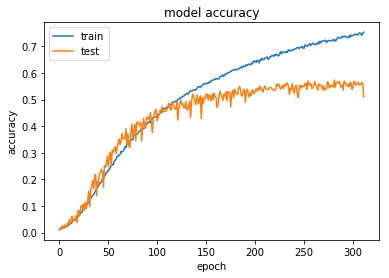

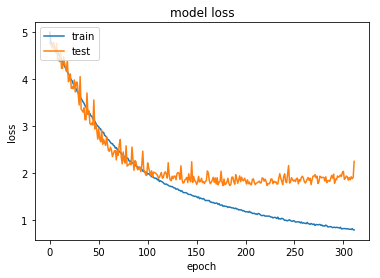

In [23]:

# summarize history for accuracy
plt.plot(hist_IR.history['acc'])
plt.plot(hist_IR.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_IR.history['loss'])
plt.plot(hist_IR.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
val_generator = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=False)

predictions = model_IR.predict_generator(val_generator, steps=258)
# Get most likely class
ir_y_pred = np.argmax(predictions, axis=1) 
ir_y_test = val_generator.classes
class_labels = list(val_generator.class_indices.keys())    

cf_report = classification_report(ir_y_test, ir_y_pred, target_names=class_labels)
print(cf_report)    

Found 4116 images belonging to 120 classes.
                                          precision    recall  f1-score   support

                     n02085620-Chihuahua       0.22      0.28      0.25        39
              n02085782-Japanese_spaniel       0.58      0.84      0.69        44
                   n02085936-Maltese_dog       0.54      0.67      0.60        49
                      n02086079-Pekinese       0.56      0.50      0.53        28
                      n02086240-Shih-Tzu       0.55      0.38      0.45        42
              n02086646-Blenheim_spaniel       0.80      0.74      0.77        38
                      n02086910-papillon       0.74      0.72      0.73        39
                   n02087046-toy_terrier       0.51      0.44      0.47        41
           n02087394-Rhodesian_ridgeback       0.33      0.53      0.41        30
                  n02088094-Afghan_hound       0.48      0.70      0.57        46
                        n02088238-basset       0.62  

Confusion matrix, without normalization
[[11  0  1 ...,  1  1  1]
 [ 1 37  0 ...,  0  0  0]
 [ 0  1 33 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 18  1  0]
 [ 0  0  0 ...,  1 18  2]
 [ 0  0  0 ...,  0  0 28]]
Normalized confusion matrix
[[ 0.28  0.    0.03 ...,  0.03  0.03  0.03]
 [ 0.02  0.84  0.   ...,  0.    0.    0.  ]
 [ 0.    0.02  0.67 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.56  0.03  0.  ]
 [ 0.    0.    0.   ...,  0.03  0.62  0.07]
 [ 0.    0.    0.   ...,  0.    0.    0.88]]


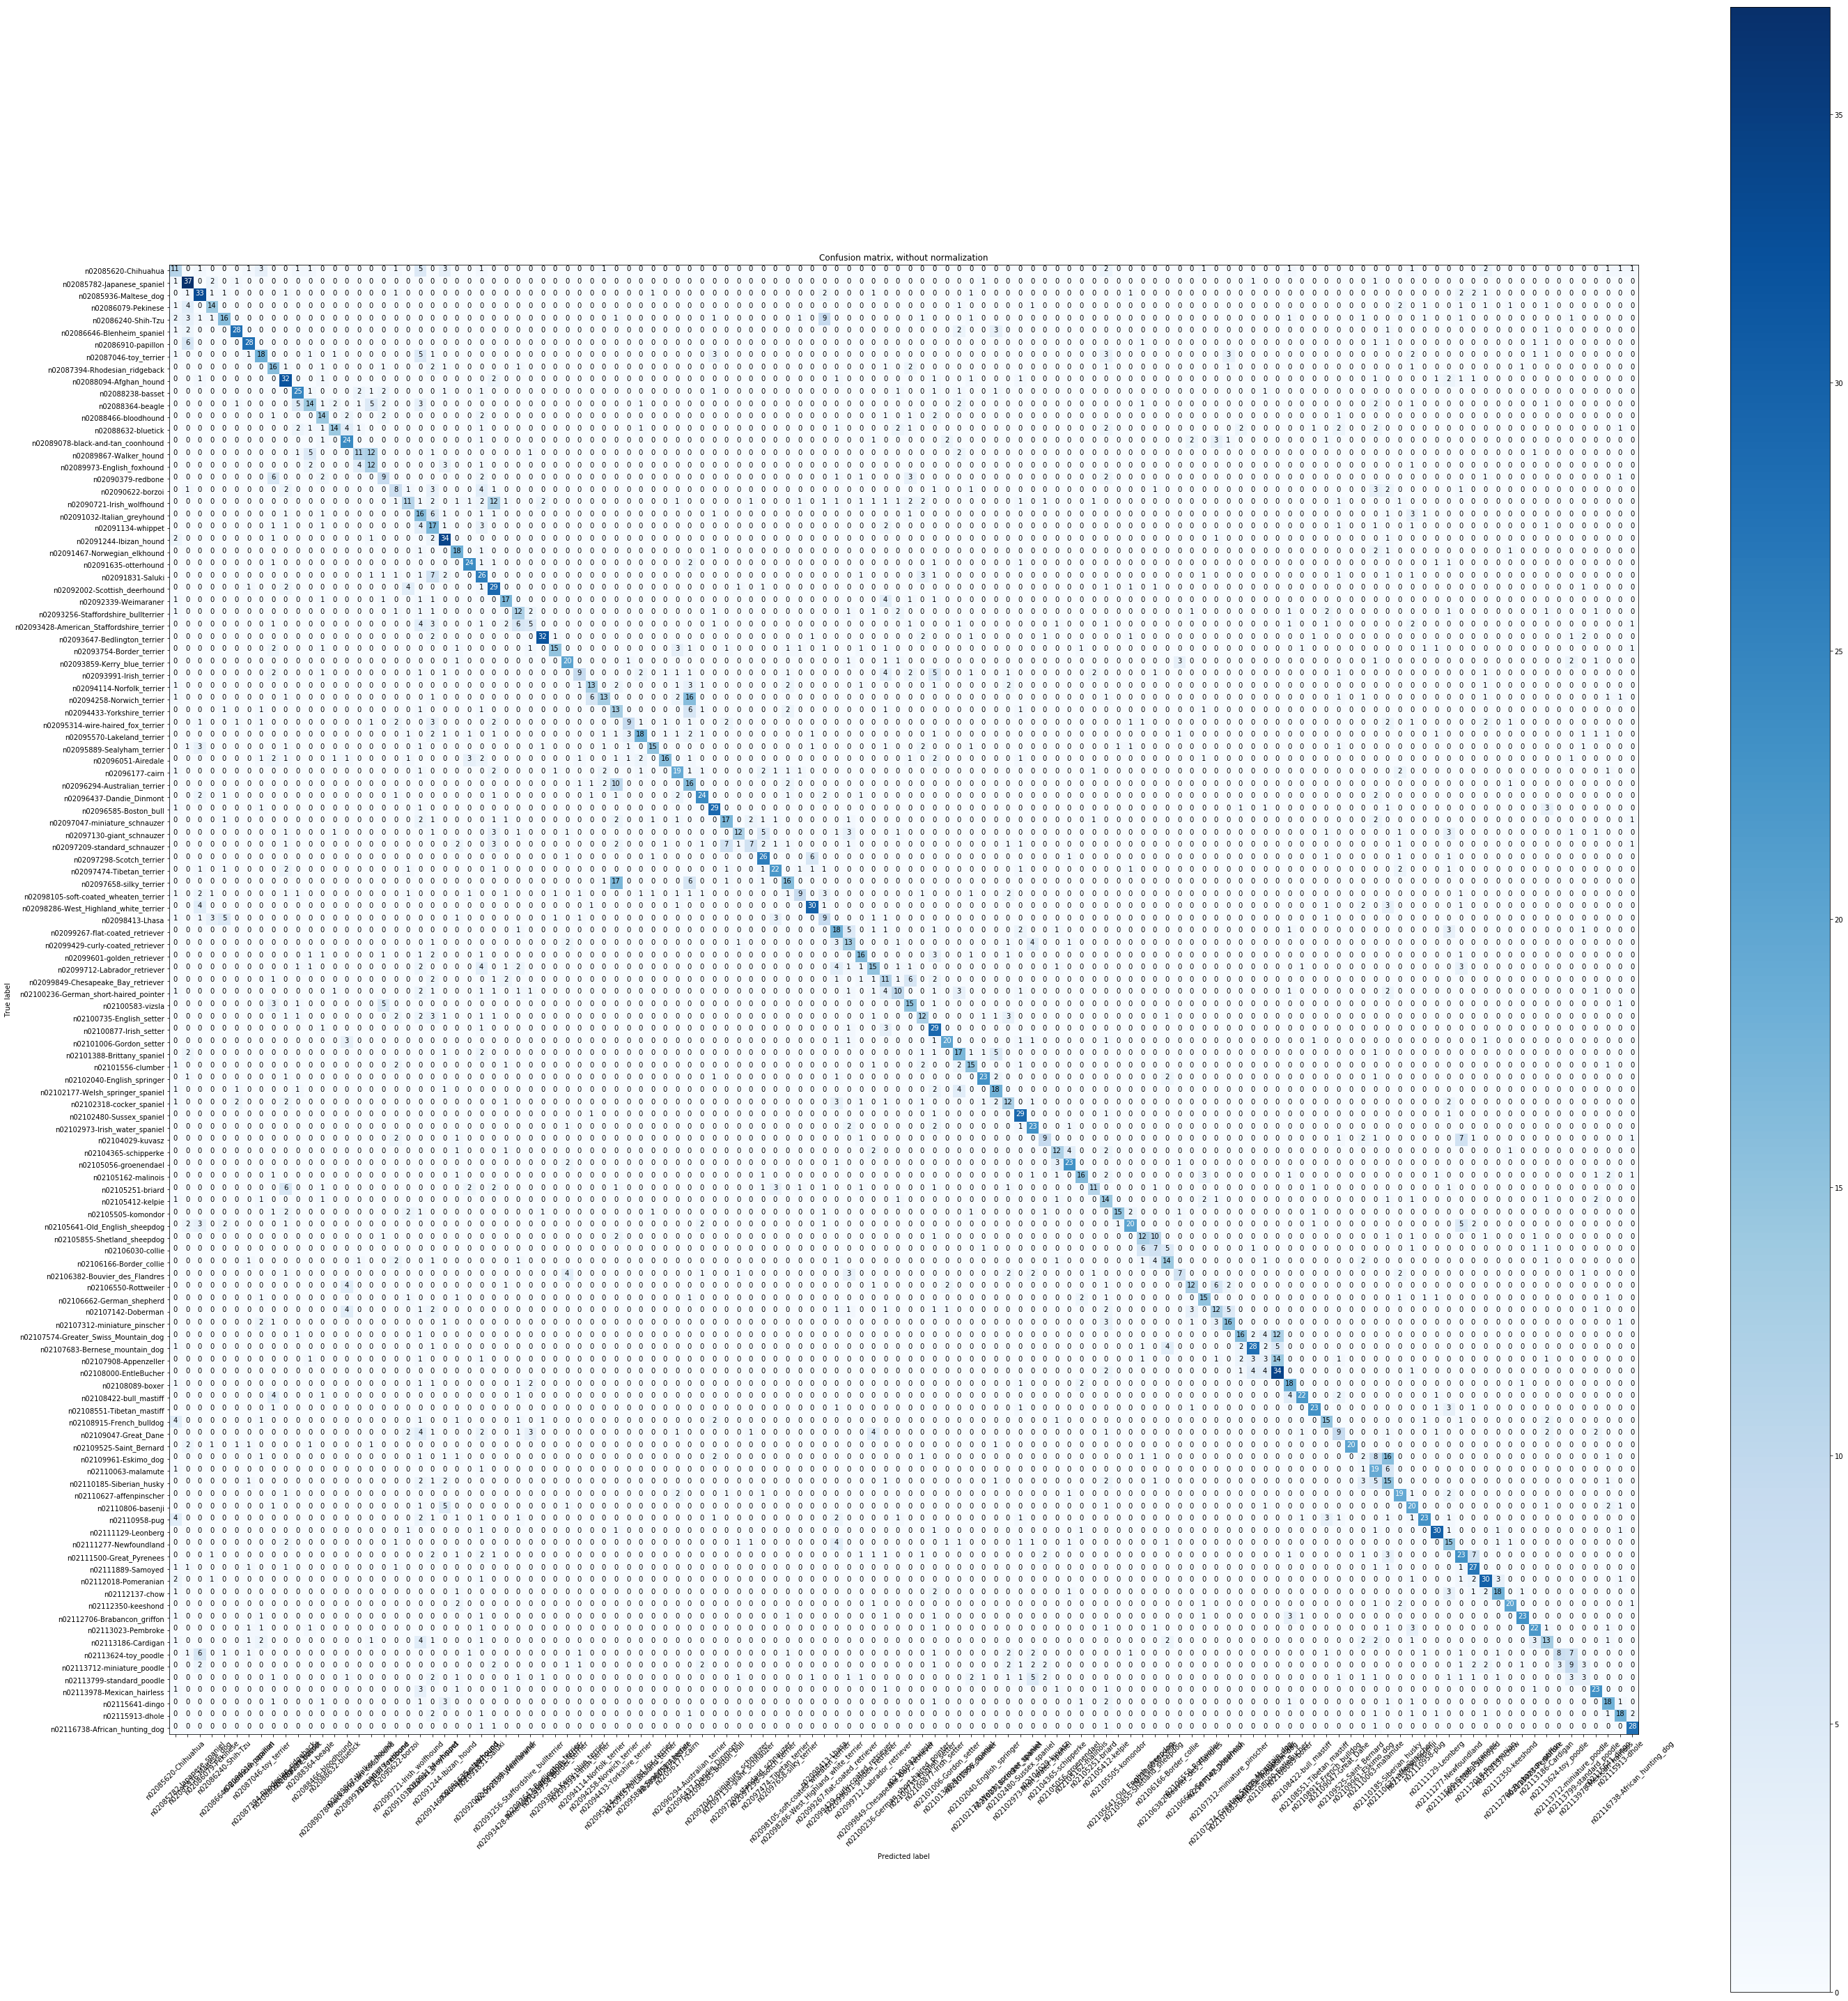

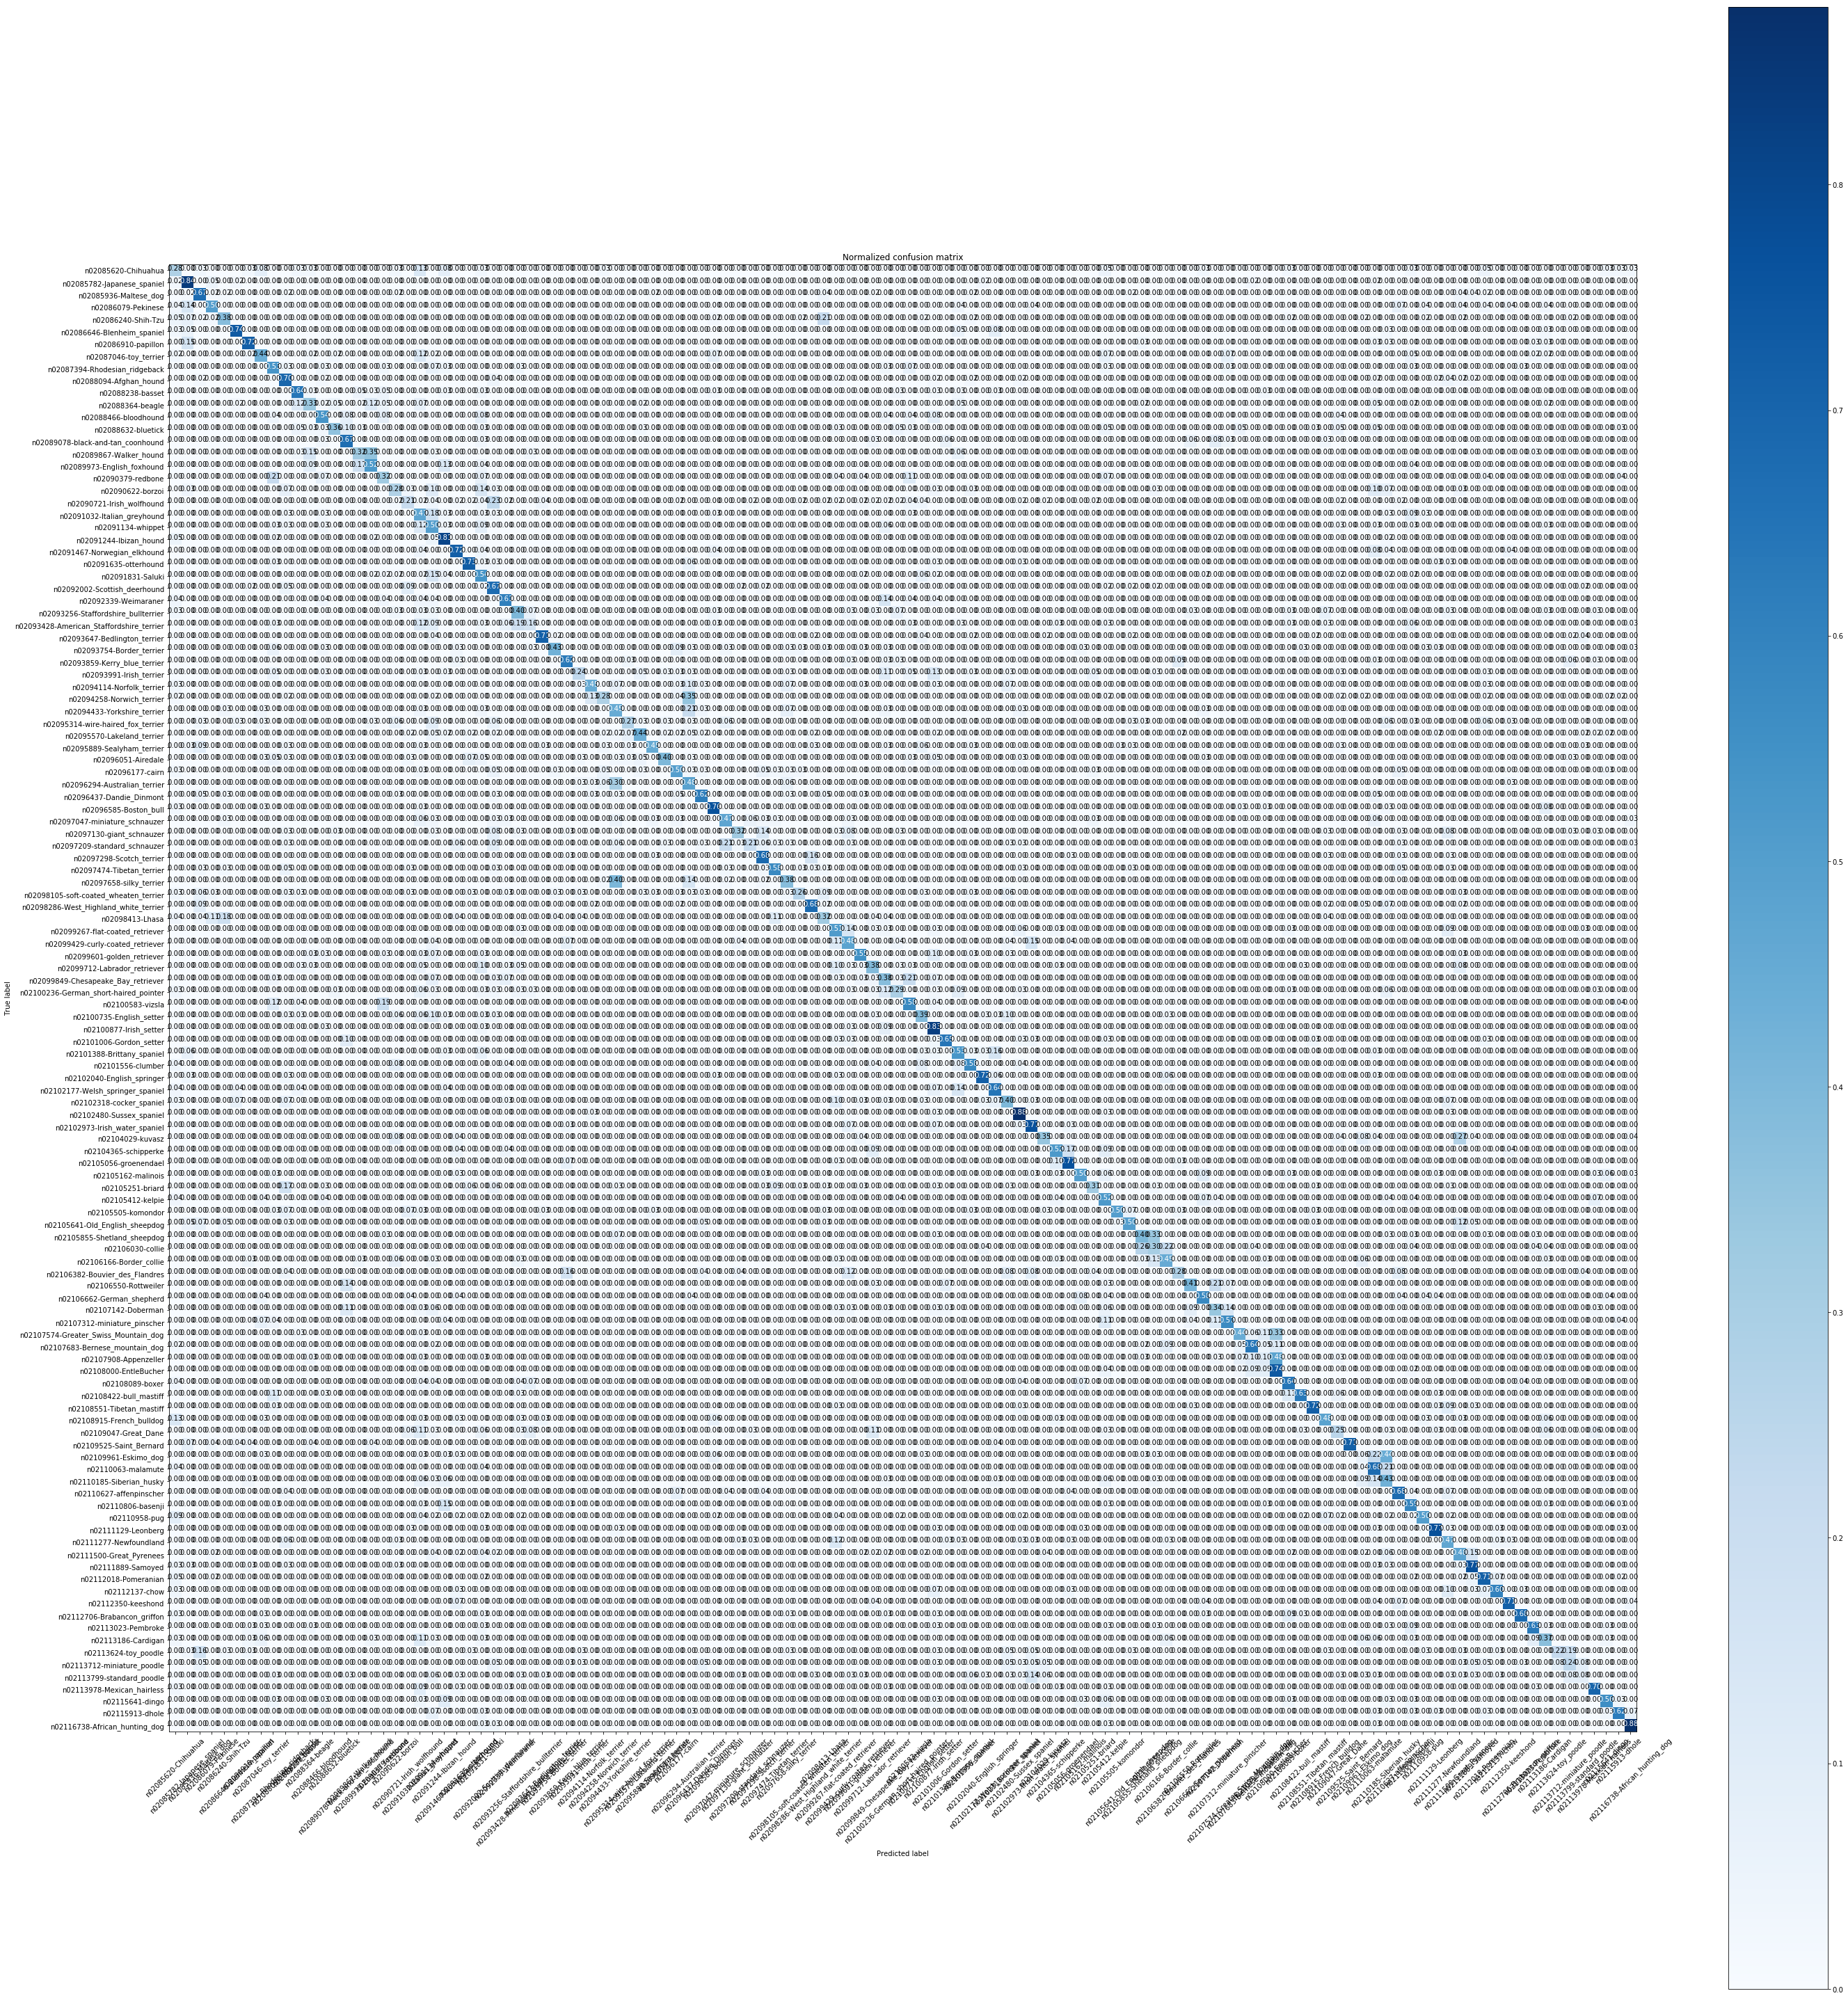

In [79]:
# Compute confusion matrix
ir_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(40,40))
plot_confusion_matrix(ir_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(40,40))
plot_confusion_matrix(ir_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

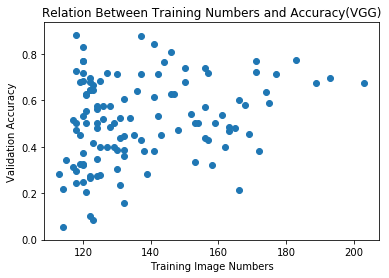

In [80]:
recall = np.diag(ir_matrix.astype('float') / ir_matrix.sum(axis=1)[:, np.newaxis])

Img_count['recall'] = pd.Series(recall, index = Img_count.index)
plt.scatter(Img_count.img_count, Img_count.recall)
plt.title('Relation Between Training Numbers and Accuracy(VGG)')
plt.xlabel('Training Image Numbers')
plt.ylabel('Validation Accuracy')
plt.show()


# Model 3: Inception Model

In [9]:
# Inception model
from keras.layers import AveragePooling2D
IMAGE_HEIGHT  = 128
IMAGE_WIDTH   = 128
NUM_CHANNELS  = 3
BATCH_SIZE    = 16
EPOCHS = 300
input_img = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Convolution block1
inp = Conv2D(16, (3,3), padding='same', activation='relu')(input_img)
inp = MaxPooling2D(pool_size=(2,2), padding='same')(inp)

# Inception block1
tower_1 = Conv2D(16, (1, 1), padding='same', activation='relu')(inp)
tower_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(16, (1, 1), padding='same', activation='relu')(inp)
tower_2 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(tower_2)

tower_3 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(inp)

tower_4 = AveragePooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(inp)
tower_4 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_4)

output1 = keras.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
output1 = BatchNormalization()(output1)


# Inception block2
tower_5 = Conv2D(16, (1, 1), padding='same', activation='relu')(output1)
tower_5 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_5)
tower_5 = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu')(tower_5)

tower_6 = Conv2D(16, (1, 1), padding='same', activation='relu')(output1)
tower_6 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(tower_6)

tower_7 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(output1)

tower_8 = AveragePooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(output1)
tower_8 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_8)

output2 = keras.layers.concatenate([tower_5, tower_6, tower_7, tower_8], axis=-1)
output2 = BatchNormalization()(output2)


# Inception block3
tower_9 = Conv2D(16, (1, 1), padding='same', activation='relu')(output2)
tower_9 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_9)
tower_9 = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu')(tower_9)

tower_10 = Conv2D(16, (1, 1), padding='same', activation='relu')(output2)
tower_10 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(tower_10)

tower_11 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(output2)

tower_12 = AveragePooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(output2)
tower_12 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_12)

output3 = keras.layers.concatenate([tower_9, tower_10, tower_11, tower_12], axis=-1)
output3 = BatchNormalization()(output3)

# Inception block4
tower_13 = Conv2D(16, (1, 1), padding='same', activation='relu')(output3)
tower_13 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_13)
tower_13 = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu')(tower_13)

tower_14 = Conv2D(16, (1, 1), padding='same', activation='relu')(output3)
tower_14 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(tower_14)

tower_15 = Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu')(output3)

tower_16 = AveragePooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(output3)
tower_16 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_16)

output4 = keras.layers.concatenate([tower_13, tower_14, tower_15, tower_16], axis=-1)
output4 = BatchNormalization()(output4)

# Fully Connected layers
output4 = Flatten()(output4)
output4 = Dense(2048, activation='relu')(output4)
output4 = Dropout(0.5)(output4)
output4 = Dense(1024, activation='relu')(output4)
output4 = Dropout(0.5)(output4)
prediction = Dense(120, activation='softmax')(output4)

model_IC = Model(inputs=input_img, outputs=prediction)
sgd = optimizers.SGD(lr=0.01, decay=1e-6)
model_IC.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [7]:
from keras.utils import plot_model
plot_model(model_IC, to_file='model_IC.png')

In [10]:
train_data_dir = 'D://PythonProjects//Dogs//Images//trainset'
test_data_dir = 'D://PythonProjects//Dogs//Images//testset'
train_datagen = ImageDataGenerator(
                                   rotation_range=0.3,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=True)

hist_IC = model_IC.fit_generator(train_generator,
                   steps_per_epoch = 16464//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    validation_steps=4116//BATCH_SIZE)

model_IC.save_weights('IC_weights1.h5')

Found 16464 images belonging to 120 classes.
Found 4116 images belonging to 120 classes.
Epoch 1/300
1029/1029 [==============================] - 91s 88ms/step - loss: 4.9551 - acc: 0.0105 - val_loss: 4.7719 - val_acc: 0.0102
Epoch 2/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.7939 - acc: 0.0165 - val_loss: 4.7301 - val_acc: 0.0195
Epoch 3/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.7457 - acc: 0.0173 - val_loss: 4.6457 - val_acc: 0.0236
Epoch 4/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.6979 - acc: 0.0202 - val_loss: 4.5987 - val_acc: 0.0263
Epoch 5/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.6542 - acc: 0.0240 - val_loss: 4.5328 - val_acc: 0.0299
Epoch 6/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.6176 - acc: 0.0267 - val_loss: 4.5030 - val_acc: 0.0285
Epoch 7/300
1029/1029 [==============================] - 89s 87ms/step - loss: 4.5804 - a

Epoch 60/300
1029/1029 [==============================] - 89s 86ms/step - loss: 3.3752 - acc: 0.1699 - val_loss: 3.6500 - val_acc: 0.1440
Epoch 61/300
1029/1029 [==============================] - 89s 87ms/step - loss: 3.3579 - acc: 0.1715 - val_loss: 3.4249 - val_acc: 0.1724
Epoch 62/300
1029/1029 [==============================] - 89s 87ms/step - loss: 3.3324 - acc: 0.1777 - val_loss: 3.2925 - val_acc: 0.1890
Epoch 63/300
1029/1029 [==============================] - 89s 86ms/step - loss: 3.3283 - acc: 0.1825 - val_loss: 3.7399 - val_acc: 0.1379
Epoch 64/300
1029/1029 [==============================] - 89s 86ms/step - loss: 3.3187 - acc: 0.1815 - val_loss: 3.2733 - val_acc: 0.1946
Epoch 65/300
1029/1029 [==============================] - 89s 87ms/step - loss: 3.2852 - acc: 0.1878 - val_loss: 3.3812 - val_acc: 0.1865
Epoch 66/300
1029/1029 [==============================] - 89s 86ms/step - loss: 3.2598 - acc: 0.1938 - val_loss: 3.7562 - val_acc: 0.1440
Epoch 67/300
1029/1029 [==========

1029/1029 [==============================] - 89s 86ms/step - loss: 2.1516 - acc: 0.4130 - val_loss: 2.8029 - val_acc: 0.3169
Epoch 179/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.1339 - acc: 0.4164 - val_loss: 2.6168 - val_acc: 0.3400
Epoch 180/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.0997 - acc: 0.4207 - val_loss: 2.4256 - val_acc: 0.3718
Epoch 181/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.1155 - acc: 0.4220 - val_loss: 2.8660 - val_acc: 0.3215
Epoch 182/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.1110 - acc: 0.4170 - val_loss: 2.7591 - val_acc: 0.3322
Epoch 183/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.0912 - acc: 0.4286 - val_loss: 2.8600 - val_acc: 0.3076
Epoch 184/300
1029/1029 [==============================] - 89s 87ms/step - loss: 2.1072 - acc: 0.4199 - val_loss: 2.4605 - val_acc: 0.3726
Epoch 185/300
1029/1029 [================

1029/1029 [==============================] - 89s 86ms/step - loss: 1.7710 - acc: 0.4977 - val_loss: 3.3747 - val_acc: 0.2721
Epoch 238/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.7629 - acc: 0.4997 - val_loss: 2.4846 - val_acc: 0.3879
Epoch 239/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.7712 - acc: 0.4964 - val_loss: 2.6381 - val_acc: 0.3560
Epoch 240/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.7833 - acc: 0.4978 - val_loss: 2.5999 - val_acc: 0.3692
Epoch 241/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.7777 - acc: 0.4946 - val_loss: 2.5964 - val_acc: 0.3774
Epoch 242/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.7572 - acc: 0.5004 - val_loss: 2.4197 - val_acc: 0.4039
Epoch 243/300
1029/1029 [==============================] - 89s 87ms/step - loss: 1.7610 - acc: 0.5032 - val_loss: 2.6038 - val_acc: 0.3718
Epoch 244/300
1029/1029 [================

1029/1029 [==============================] - 89s 86ms/step - loss: 1.5198 - acc: 0.5613 - val_loss: 2.5207 - val_acc: 0.3945
Epoch 297/300
1029/1029 [==============================] - 89s 87ms/step - loss: 1.4974 - acc: 0.5647 - val_loss: 2.4078 - val_acc: 0.4180
Epoch 298/300
1029/1029 [==============================] - 89s 87ms/step - loss: 1.5075 - acc: 0.5664 - val_loss: 2.4226 - val_acc: 0.4256
Epoch 299/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.4984 - acc: 0.5660 - val_loss: 2.6865 - val_acc: 0.3755
Epoch 300/300
1029/1029 [==============================] - 89s 86ms/step - loss: 1.4898 - acc: 0.5700 - val_loss: 2.4883 - val_acc: 0.4168


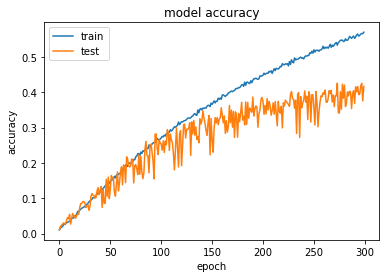

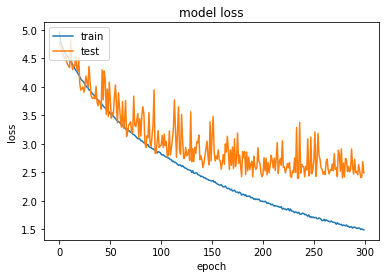

In [11]:
# summarize history for accuracy
plt.plot(hist_IC.history['acc'])
plt.plot(hist_IC.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_IC.history['loss'])
plt.plot(hist_IC.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()